C:\Users\Henry\miniconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


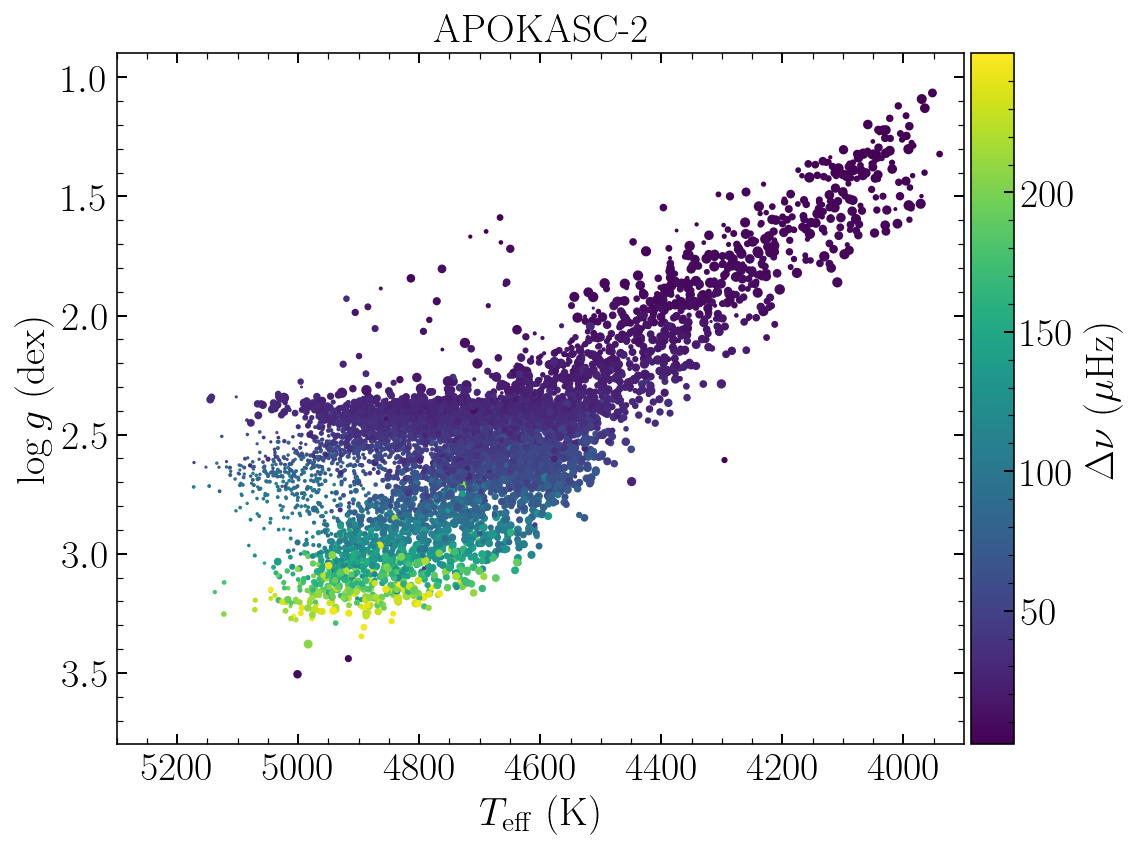

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import h5py
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astroNN.shared.matplotlib import pylab_style
import mesa_reader as mr

pylab_style(paper=True)

h5f = h5py.File("../APOKASC2.h5", "r")

h = mr.MesaData('1M_evo_track.data')
mesa_temperatures = 10 ** h.log_Teff
mesa_logg = h.log_g
star_age = h.star_age / 10 ** 9

numax = np.array(h5f["Numax"])
deltanu = np.array(h5f["Deltanu"])
es = np.array(h5f["ES"]).astype("str")
teff = np.array(h5f["TEFF"])
logg = np.array(h5f["LOGG"])
Mcorr = np.array(h5f["Mcorr"])
Rcorr = np.array(h5f["Rcorr"])
age = np.array(h5f["Age"])

good_idx = (numax != -9999.0) & (deltanu != -9999.0)

fig = plt.figure(figsize=(8., 6.))
ax = plt.gca()
ax.set_xlim([5300, 3900])
ax.set_ylim([3.8, 0.9])
mappable = ax.scatter(teff[good_idx], logg[good_idx], c=numax[good_idx], s=(age)[good_idx], rasterized=True)
# ax.scatter(mesa_temperatures, mesa_logg, c=star_age, s=1, vmin=12, vmax=13, cmap="coolwarm")
ax.set_title("APOKASC-2")
ax.set_xlabel(r"$T_\mathrm{eff}\ (\mathrm{K})$")
ax.set_ylabel(r"$\log{g}\ (\mathrm{dex})$")
# ax.minorticks_on()
# ax.tick_params(labelsize=19, width=2, length=15, which="major")
# ax.tick_params(width=1, length=7.5, which="minor")
# ax.legend(loc="upper right", markerscale=3)
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, mappable=mappable)
cbar.ax.tick_params()
cbar.set_label(r"$\Delta{\nu}\ (\mu \mathrm{Hz})$")
plt.tight_layout()
plt.savefig("apokasc.pdf")